In [1]:
# A/B Testing Analysis of Webpage Conversion Rates

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [4]:
pd.set_option('display.float_format', '{:.4f}'.format)
plt.rcParams['figure.figsize'] = (8, 5)

In [5]:
# Loading dataset in pandas library

In [7]:
df = pd.read_csv(r'C:/Users/nadanee/Desktop/to-do/ab test projects/ab_testing.csv')

df.head()

,User ID,Group,Page Views,Time Spent,Conversion,Device,Location
0,14292,B,3,424,No,Mobile,Northern Ireland
1,11682,A,9,342,No,Mobile,Scotland
2,19825,A,2,396,No,Desktop,Northern Ireland
3,16080,B,4,318,No,Desktop,Wales
4,18851,A,1,338,Yes,Desktop,Scotland


In [8]:
# Data Validation and Cleaning

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   User ID     5000 non-null   int64 
 1   Group       5000 non-null   object
 2   Page Views  5000 non-null   int64 
 3   Time Spent  5000 non-null   int64 
 4   Conversion  5000 non-null   object
 5   Device      5000 non-null   object
 6   Location    5000 non-null   object
dtypes: int64(3), object(4)
memory usage: 273.6+ KB


In [10]:
# Checking for missing values

df.isna().sum()

User ID       0
Group         0
Page Views    0
Time Spent    0
Conversion    0
Device        0
Location      0
dtype: int64

In [11]:
# Checking for correct data types

In [14]:
df['conversion_flag'] = df['Conversion'].map({'Yes': 1, 'No': 0})
df['group'] = df['Group'].astype('category')
df['device'] = df['Device'].astype('category')
df['location'] = df['Location'].astype('category')

In [15]:
# Checking to ensure one datapoint per User

In [17]:
df['User ID'].nunique(), df.shape[0]

(5000, 5000)

In [18]:
# Exploratory Data Analysis (EDA)

In [19]:
# Group Distribution

df['group'].value_counts(normalize=True)

group
A   0.5038
B   0.4962
Name: proportion, dtype: float64

In [20]:
# Conversion rate by group

conversion_summary = (
    df.groupby('group')['conversion_flag']
    .agg(['count', 'sum', 'mean'])
    .rename(columns={'count':'users', 'sum':'conversion', 'mean':'conversion_rate'})
)

conversion_summary

C:\Users\nadanee\AppData\Local\Temp\ipykernel_25612\3818562811.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('group')['conversion_flag']


,users,conversion,conversion_rate
group,,,
A,2519,136,0.0540
B,2481,349,0.1407


In [23]:
# Primary A/B Test: Conversion Rate Difference

# Hypotheses

# 1. H0: Conversion Rate A = Conversion Rate B
# 2. H1: Conversion Rate A != Conversion Rate B

In [24]:
# Two-Proportion Z-Test

In [29]:
# Pulling values
conv_A = conversion_summary.loc['A', 'conversion']
users_A = conversion_summary.loc['A', 'users']

conv_B = conversion_summary.loc['B', 'conversion']
users_B = conversion_summary.loc['B', 'users']

# Pooled Probability
p_pool = (conv_A + conv_B) / (users_A + users_B)

# Standard error
se = np.sqrt(p_pool * (1 - p_pool) * (1/users_A + 1/users_B))

# Z-score
z_score = ((conv_B / users_B) - (conv_A / users_A)) /se

# Two-tailed p-value
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))

z_score, p_value

(np.float64(10.354488520266216), np.float64(0.0))

In [30]:
# Decision Rule

alpha = 0.05

if p_value < alpha:
    print("Statistically significant difference in conversion rates.")
else:
    print("No Statistically significant difference detected")

Statistically significant difference in conversion rates.


In [31]:
# Effect Size & Business Impact

conversion_summary['conversion_rate']

group
A   0.0540
B   0.1407
Name: conversion_rate, dtype: float64

In [32]:
# Absolute & Relative Lift

absolute_lift = conversion_summary.loc['B', 'conversion_rate'] - conversion_summary.loc['A','conversion_rate']
relative_lift = absolute_lift / conversion_summary.loc['A', 'conversion_rate']

absolute_lift, relative_lift

(np.float64(0.08667940660252538), np.float64(1.6054810678805989))

In [33]:
# Engagement Analysis: Time Spent

In [35]:
# Distribution check

df.groupby('group')['Time Spent'].describe()

C:\Users\nadanee\AppData\Local\Temp\ipykernel_25612\2011755214.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('group')['Time Spent'].describe()


,count,mean,std,min,25%,50%,75%,max
group,,,,,,,,
A,2519.0000,241.7332,117.3400,40.0000,137.5000,241.0000,343.0000,449.0000
B,2481.0000,243.3039,119.1936,40.0000,136.0000,244.0000,348.0000,449.0000


In [37]:
# Non-parametric test

time_A = df[df['group']=='A']['Time Spent']
time_B = df[df['group']== 'B']['Time Spent']

u_stat, p_time = stats.mannwhitneyu(time_A, time_B, alternative='two-sided')

u_stat, p_time

(np.float64(3101095.0), np.float64(0.6420301034033706))

In [38]:
# Segmented A/B Testing

In [39]:
# Conversion by Device

device_summary = (
    df.groupby(['device', 'group'])['conversion_flag']
    .mean()
    .reset_index()
)

device_summary

C:\Users\nadanee\AppData\Local\Temp\ipykernel_25612\914042140.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['device', 'group'])['conversion_flag']


,device,group,conversion_flag
0,Desktop,A,0.0587
1,Desktop,B,0.1391
2,Mobile,A,0.0494
3,Mobile,B,0.1424


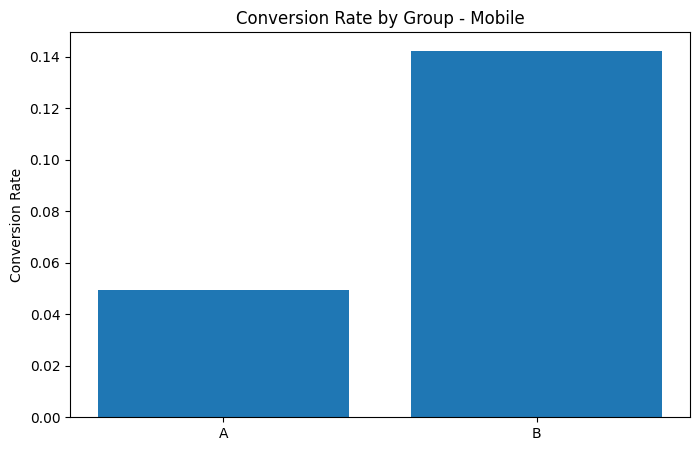

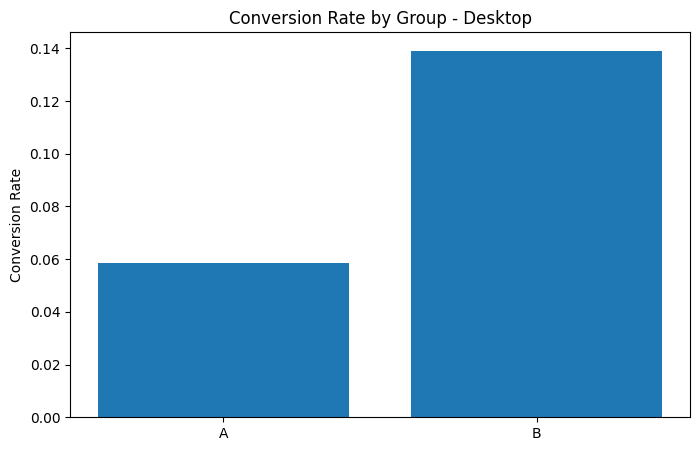

In [40]:
# Visuaization

for device in df['device'].unique():
    subset = device_summary[device_summary['device'] == device]
    plt.bar(subset['group'], subset['conversion_flag'])
    plt.title(f'Conversion Rate by Group - {device}')
    plt.ylabel('Conversion Rate')
    plt.show()

In [41]:
# Bias & Sanity Checks

In [42]:
# Device distribution

pd.crosstab(df['group'], df['device'], normalize='index')

device,Desktop,Mobile
group,,
A,0.4938,0.5062
B,0.5216,0.4784


In [44]:
# Chi-Square test

chi2, p_bias, _, _ = stats.chi2_contingency(
    pd.crosstab(df['group'], df['device'])
)

p_bias

np.float64(0.05338692515743378)

In [45]:
# Conversion vs Engagement Relationship

df.groupby('conversion_flag')['Time Spent'].mean()

conversion_flag
0   242.4312
1   243.2701
Name: Time Spent, dtype: float64

In [46]:
# Correlation

df[['Time Spent', 'conversion_flag']].corr()

,Time Spent,conversion_flag
Time Spent,1.0000,0.0021
conversion_flag,0.0021,1.0000


In [47]:
# Visualization: Conversion Rate Comparison

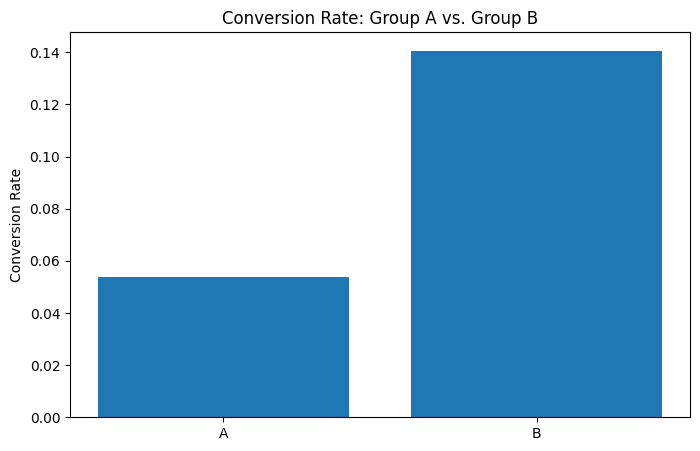

In [48]:
plt.bar(conversion_summary.index, conversion_summary['conversion_rate'])
plt.title('Conversion Rate: Group A vs. Group B')
plt.ylabel('Conversion Rate')
plt.show()